## Construção do diagrama P-V do CO$_2$ usando o plugin CoolProp

In [81]:
#Carregando os pacotes do Python
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#Importando as bibliotecas do CoolProp
import CoolProp as CP
from CoolProp.CoolProp import PropsSI

In [82]:
#Selecionando o fluido de trabalho:
#Obs.: o CO2 é chamado "CarbonDioxide" no programa
Fluido='CarbonDioxide'
print('O fluido é: '+ Fluido)

O fluido é: CarbonDioxide


In [83]:
#Construindo o diagrama P-V
npontos=1000
P_critico=PropsSI('PCRIT',Fluido) #em Pa
Pmin=25.e5 #em Pa
Pmax=P_critico-100.0 #em Pa

#Atribuição da pressão fornecida
Pdada=52.5e5 #em Pa

P_vec=np.linspace(Pmin,Pmax,num=npontos)
P_vec=np.append(P_vec,P_critico)

In [101]:
#Retornando os valores da massa específica-estados líquido e gasoso 
#nesta faixa de pressao
d_sat_liq=PropsSI('D','P',P_vec,'Q',0,Fluido)
d_sat_vap=PropsSI('D','P',P_vec,'Q',1,Fluido)
v_sat_liq=1/d_sat_liq
v_sat_vap=1/d_sat_vap
vmin=np.min(v_sat_liq)
vmax=np.max(v_sat_vap)

#Cálculo da isoterma e suas dependentes
t_isothermal=PropsSI('T','P',Pdada,'Q',0,Fluido)
d_sat_isothermal=PropsSI('D','P',P_vec,'T',t_isothermal,Fluido)
v_sat_isothermal=1/d_sat_isothermal

print(t_isothermal)

289.4631591730595


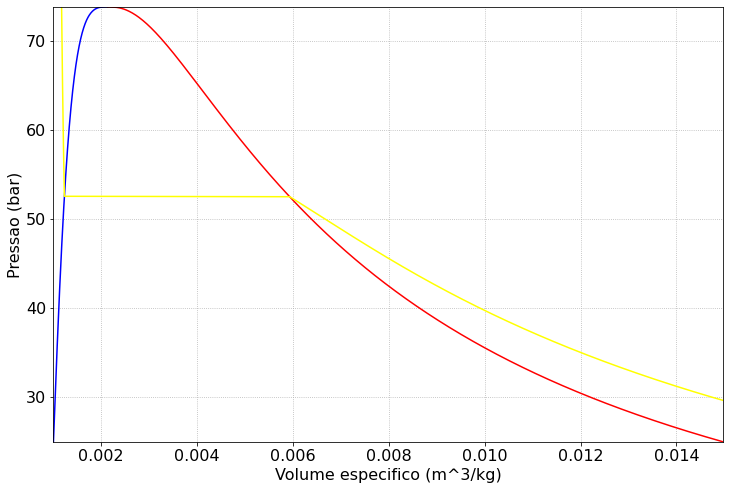

In [91]:
#Plotando agora o diagrama P-V 
#Unidades: v em m^3/kg, pressão em bar
plt.figure(num=None,figsize=(12,8),facecolor='w',edgecolor='k')
plt.plot(v_sat_liq,P_vec/1e5,color='blue')
plt.plot(v_sat_vap,P_vec/1e5,color='red')

#plotando a isoterma
plt.plot(v_sat_isothermal,P_vec/1e5,color='yellow')

plt.grid(linestyle=':')
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.xlabel('Volume especifico (m^3/kg)', fontsize=16)
plt.ylabel('Pressao (bar)', fontsize=16)
plt.axis([vmin,vmax,Pmin/1e5,P_critico/1e5])
plt.show()